Initialisation du cuircuit quantique

In [1]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import math

qc = QuantumCircuit(4)
pi = math.pi

Initialisation des différentes parties :
- porte cccz
- oracle

In [2]:
#######################
###    cccZ-Gate    ###
#######################
def cccz(qc):
    qc.cp(pi/4, 0, 3)
    qc.cx(0, 1)
    qc.cp(-pi/4, 1, 3)
    qc.cx(0, 1)
    qc.cp(pi/4, 1, 3)
    qc.cx(1, 2)
    qc.cp(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cp(pi/4, 2, 3)
    qc.cx(1, 2)
    qc.cp(-pi/4, 2, 3)
    qc.cx(0, 2)
    qc.cp(pi/4, 2, 3)
    return qc


#######################
### Oracle for 0010 ###
#######################
def oracle_0010(qc):
    qc.x([0,2,3])
    qc = cccz(qc)
    qc.x([0,2,3])
    return qc

#######################
### Oracle for 0110 ###
#######################
def oracle_0110(qc):
    qc.x([0,3])
    qc = cccz(qc)
    qc.x([0,3])
    return qc

#######################
### Oracle for 0100 ###
#######################
def oracle_0100(qc):
    qc.x([0,1,3])
    qc = cccz(qc)
    qc.x([0,1,3])
    return qc

Construction du circuit quantique

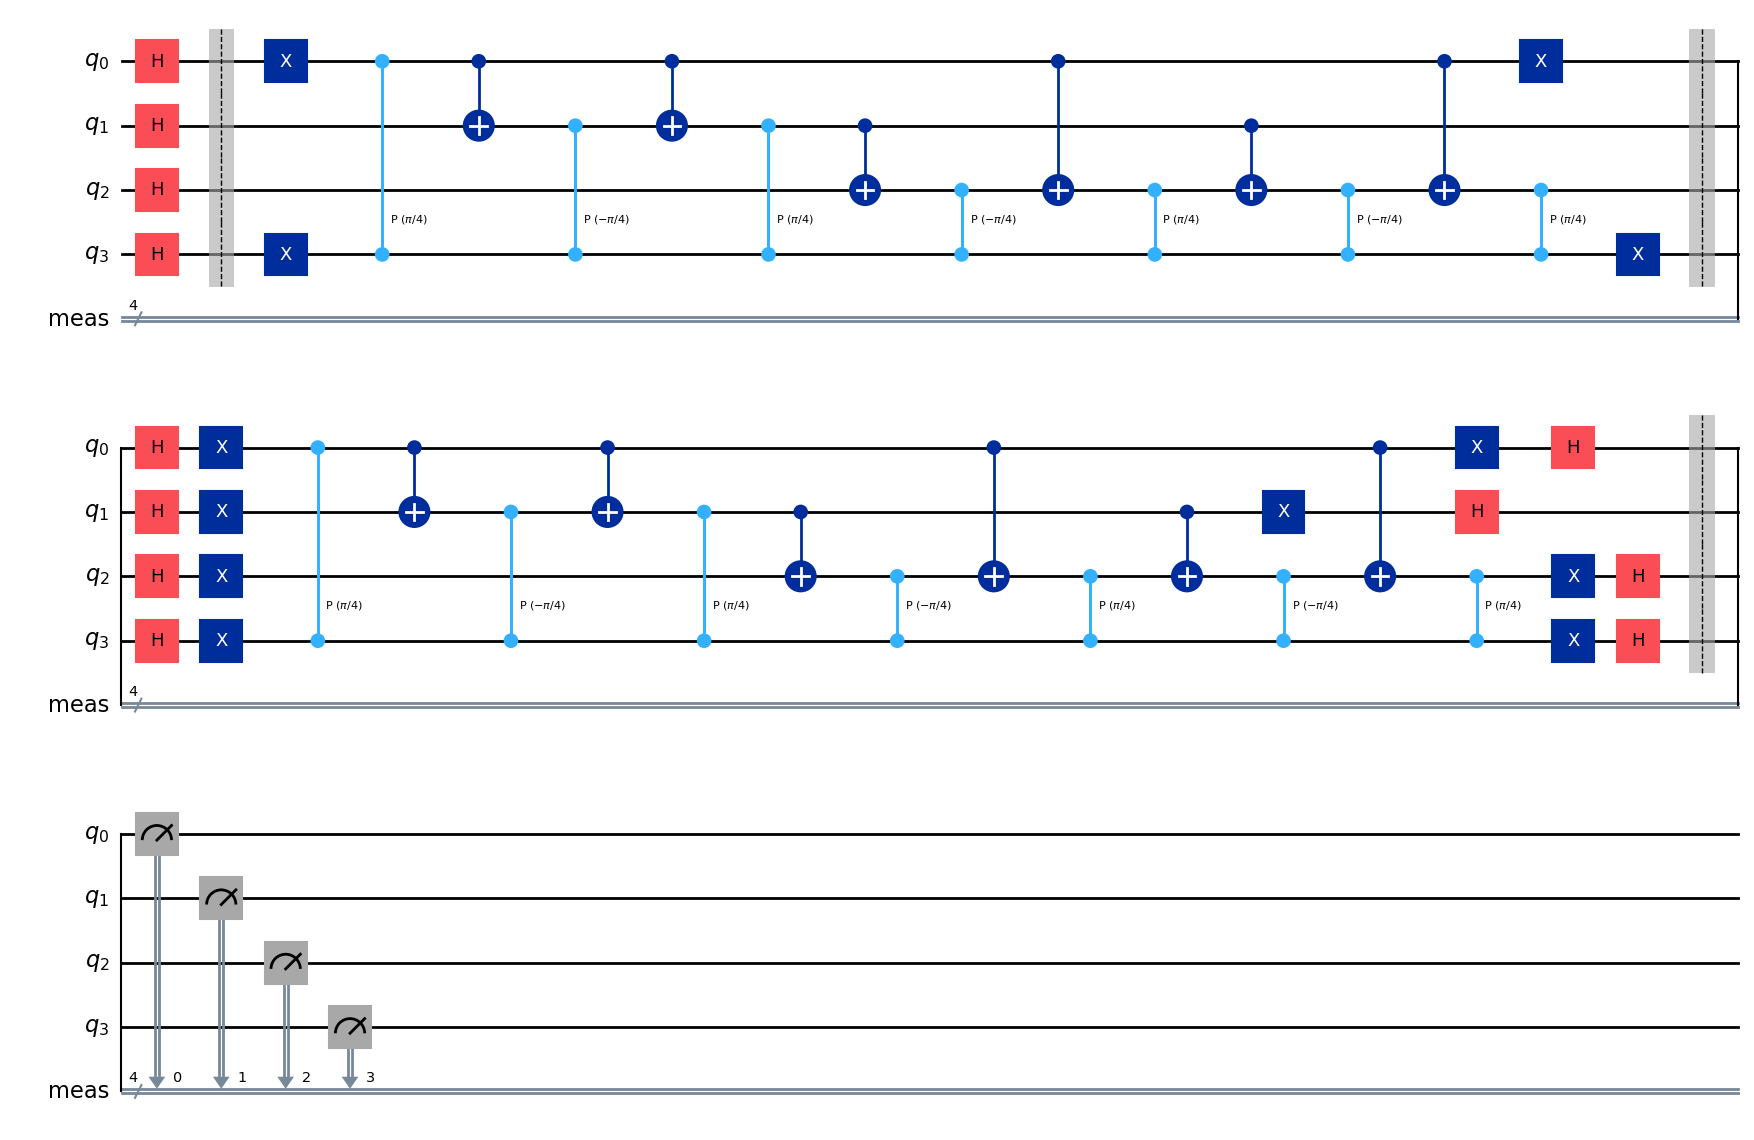

In [3]:
#######################
######## init #########
#######################
qc.h([0,1,2,3])
qc.barrier()


#######################
####    Oracle     ####
#######################
#qc = oracle_0010(qc)
#qc = oracle_0110(qc)
qc = oracle_0110(qc)
qc.barrier()


#######################
#### Amplification ####
#######################
qc.h([0,1,2,3])
qc.x([0,1,2,3])
######## cccZ #########
qc = cccz(qc)
####### end cccZ #######
qc.x([0,1,2,3])
qc.h([0,1,2,3])


########################
####### Measure ########
########################
qc.measure_all()


qc.draw('mpl')

Exécution et affichage des résultats

{'0110': 470, '1111': 30, '1100': 35, '0010': 34, '1110': 39, '0101': 39, '1010': 39, '0000': 33, '1011': 29, '0111': 35, '1001': 33, '0100': 33, '1000': 43, '0001': 42, '0011': 35, '1101': 31}


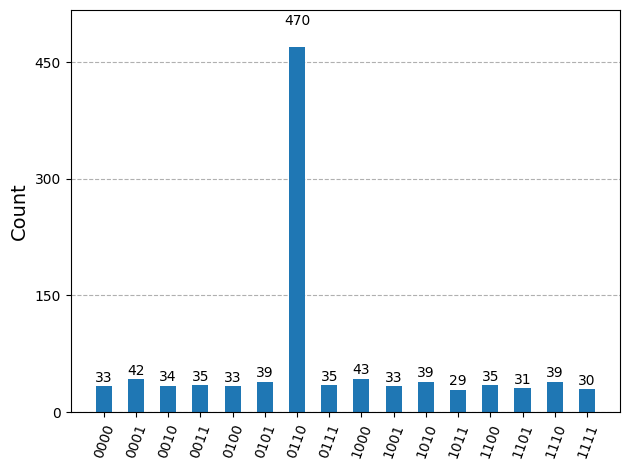

In [4]:
sim = Aer.get_backend('qasm_simulator')
results = sim.run(transpile(qc, sim), shots=1000).result()
counts  = results.get_counts(qc)

print(counts)
plot_histogram(counts)